<center><b>Famous People - Pantheon</b></center>

This blog post introduce you the most famous people in history from the perspective of data. You will find facts about their places, birth/death, and occupations.

# An overview

The **Pantheon** includes altogether **88,937** famous people from history and today. Some of them can be traced back to Ancient Babylon, while some are born very recently (for example Prince Charles of Luxembourg born in 2020). They are from all over the world, in Africa, Asia, Europe, North America, Oceania, and South America. The 88,937 famous people also have different occupations, ranging from religious figure to business person.

# Space-time

In spite of the hundred thousand years of human history, characters and language emerges several thousand years ago. Tons of stories and historical facts have been recorded since then. We are interested from a macroscopic view first, which is the space and time (refered to their born places and years).

The number of famous people in different centuries are shown in the figure below. Those before 1,000 AD are put into one group. Overall, we can see a growth of number of famous people in the history, especially in recentl several centuries. However, there is also a decrease in the 14th century. This period is just in between the Middle Age and the Renaissance, which is less prosperous compared with the time before and after. With the fast development of modern society and the information explosion, the number of famous people increased exponentially since the 18th century. In the 21st century, Internet brings us stories, news, and knowledge from all over the world. We believe the number of famous people will be even more in the next generation.

From these data, we can conclude that the number of famous people is closely related to the prosperity of time and the way of information dissemination.

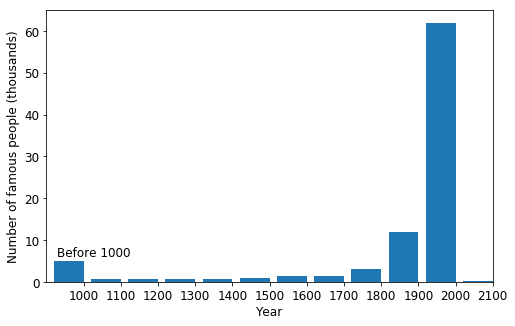

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from itertools import chain
import matplotlib as mpl
mpl.rcParams['font.size'] = 12
df = pd.read_csv('../data/person_2020_update.csv',low_memory=False)
df.dropna(subset=['birthyear'], inplace=True)
time_x = [1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000,2100]
time_y = [0 for x in time_x]
plt.figure(figsize=(8,5))
for i in df.index:
    byear = df.loc[i,'birthyear']
    for j,x in enumerate(time_x):
        if x >= byear:
            time_y[j] += 1
            break
plt.bar(time_x,np.array(time_y)/1000,width=-80,align='edge')
plt.xlim(900,2100)
plt.ylim(0,65)
plt.ylabel('Number of famous people (thousands)')
plt.xlabel('Year')
plt.xticks([1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000,2100])
plt.text(930,6,'Before 1000')
plt.show()

We split the data into different time periods: before 1000, 1000-1500, 1500-1800, 1800-1900, and 1900-2000. The birth places are plotted on the map shown in the following figures. The different birth places expand with the evolution of history. In the ancient time (before 1000), most of the famous people were recorded around the Mediterranean, for example Rome and Greece. There are also some born in the east Asia. This gradually expands to all over the world, especially in Europe and North America. The density of the famous people distribution is closely related to the economical and cultural development.

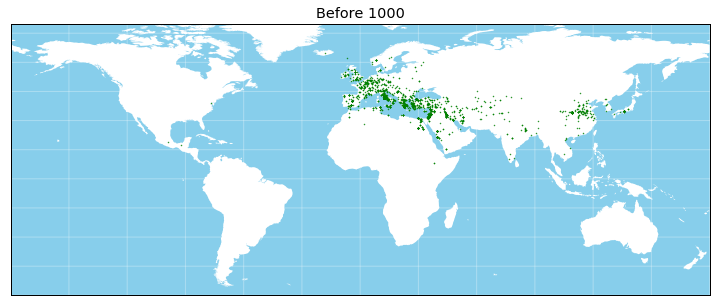

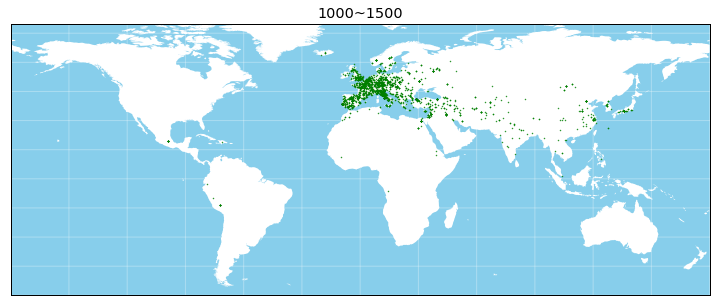

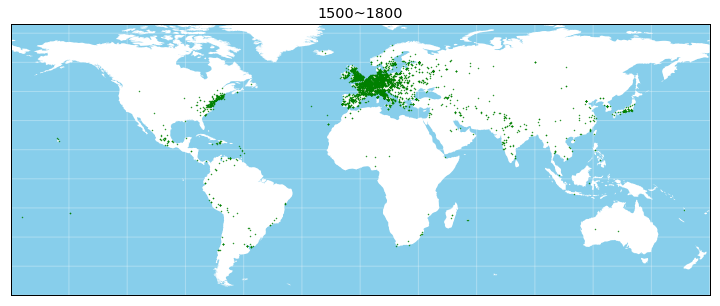

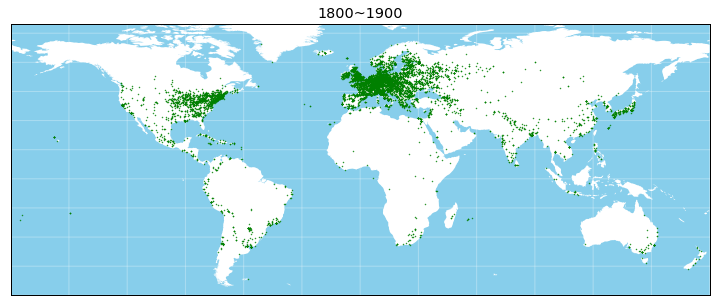

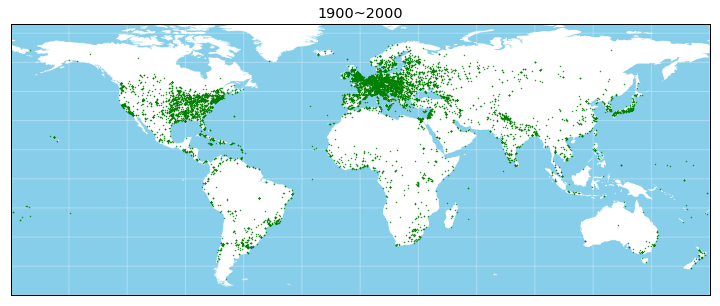

In [3]:
def draw_map(m, scale=0.2):
    m.fillcontinents(color='white', lake_color='white')
    m.drawmapboundary(fill_color='skyblue')
    
    # lats and longs are returned as a dictionary
    lats = m.drawparallels(np.linspace(-90, 90, 13))
    lons = m.drawmeridians(np.linspace(-180, 180, 13))

    # keys contain the plt.Line2D instances
    lat_lines = chain(*(tup[1][0] for tup in lats.items()))
    lon_lines = chain(*(tup[1][0] for tup in lons.items()))
    all_lines = chain(lat_lines, lon_lines)
    
    # cycle through these lines and set the desired style
    for line in all_lines:
        line.set(linestyle='-', alpha=0.3, color='w')

df = pd.read_csv('../data/person_2020_update.csv',low_memory=False)
df.dropna(subset=['birthyear', 'bplace_lat', 'bplace_lon', 'dplace_lat', 'dplace_lon'], inplace=True)
df1 = df[df['birthyear'] <= 1000]
fig = plt.figure(figsize=(14, 5), edgecolor='w')
m = Basemap(llcrnrlon=-180.,llcrnrlat=-60,urcrnrlon=180.,urcrnrlat=80.,resolution='i', area_thresh=2000.0)
draw_map(m)
for i in df1.index:
    plt.scatter(df1.loc[i,'bplace_lon'], df1.loc[i, 'bplace_lat'], zorder=10, s=0.2, color='g')
plt.title('Before 1000')
plt.show()
df1 = df[ df['birthyear'] > 1000 ]
df1 = df1[ df1['birthyear'] <= 1500 ]
fig = plt.figure(figsize=(14, 5), edgecolor='w')
m = Basemap(llcrnrlon=-180.,llcrnrlat=-60,urcrnrlon=180.,urcrnrlat=80.,resolution='i', area_thresh=2000.0)
draw_map(m)
for i in df1.index:
    plt.scatter(df1.loc[i,'bplace_lon'], df1.loc[i, 'bplace_lat'], zorder=10, s=0.2, color='g')
plt.title('1000~1500')
plt.show()
df1 = df[ df['birthyear'] > 1500 ]
df1 = df1[ df1['birthyear'] <= 1800 ]
fig = plt.figure(figsize=(14, 5), edgecolor='w')
m = Basemap(llcrnrlon=-180.,llcrnrlat=-60,urcrnrlon=180.,urcrnrlat=80.,resolution='i', area_thresh=2000.0)
draw_map(m)
for i in df1.index:
    plt.scatter(df1.loc[i,'bplace_lon'], df1.loc[i, 'bplace_lat'], zorder=10, s=0.2, color='g')
plt.title('1500~1800')
plt.show()
df1 = df[ df['birthyear'] > 1800 ]
df1 = df1[ df1['birthyear'] <= 1900 ]
fig = plt.figure(figsize=(14, 5), edgecolor='w')
m = Basemap(llcrnrlon=-180.,llcrnrlat=-60,urcrnrlon=180.,urcrnrlat=80.,resolution='i', area_thresh=2000.0)
draw_map(m)
for i in df1.index:
    plt.scatter(df1.loc[i,'bplace_lon'], df1.loc[i, 'bplace_lat'], zorder=10, s=0.2, color='g')
plt.title('1800~1900')
plt.show()
df1 = df[ df['birthyear'] > 1900 ]
df1 = df1[ df1['birthyear'] <= 2000 ]
fig = plt.figure(figsize=(14, 5), edgecolor='w')
m = Basemap(llcrnrlon=-180.,llcrnrlat=-60,urcrnrlon=180.,urcrnrlat=80.,resolution='i', area_thresh=2000.0)
draw_map(m)
for i in df1.index:
    plt.scatter(df1.loc[i,'bplace_lon'], df1.loc[i, 'bplace_lat'], zorder=10, s=0.2, color='g')
plt.title('1900~2000')
plt.show()

Some famous people were born in one country while died in another place. This migration might be because of war, work or other reasons. We are interested in the migration. The figure below shows the birth and death places in green and red, respectively. Due to the large amount of data, we only show data after 1900. In addition, migration becomes more active recently, because of the convenient transportation. From the result, we found many famous people ended up in the United States or west Europe. A large number of them might be from east Europe according to the figure.

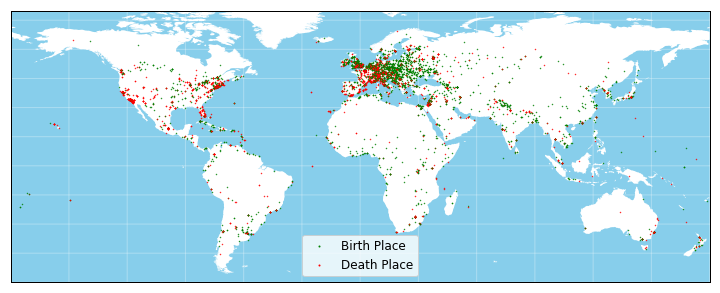

In [4]:
df = pd.read_csv('../data/person_2020_update.csv',low_memory=False)
df.dropna(subset=['birthyear', 'bplace_country', 'dplace_country', 'bplace_lat', 'bplace_lon', 'dplace_lat', 'dplace_lon'], inplace=True)
df1 = df[df['birthyear']>1900].copy()
fig = plt.figure(figsize=(14, 5), edgecolor='w')
m = Basemap(llcrnrlon=-180.,llcrnrlat=-60,urcrnrlon=180.,urcrnrlat=80.,resolution='i', area_thresh=2000.0)
draw_map(m)
for i in df1.index:
    if df1.loc[i,'bplace_country'] != df1.loc[i,'dplace_country']:
        plt.scatter(df1.loc[i,'bplace_lon'], df1.loc[i, 'bplace_lat'], zorder=10, s=0.2, color='g')
        plt.scatter(df1.loc[i,'dplace_lon'], df1.loc[i, 'dplace_lat'], zorder=10, s=0.2, color='r')
plt.scatter(-180,-90, s=1, color='g', label='Birth Place')
plt.scatter(-180,-90, s=1, color='r', label='Death Place')
plt.legend()
plt.show()

# Eurocentrism
From the above observations, we may find that Europe plays a vital role in the history. A large number of famous people were from Europe and cultures were broadcast to other places through migration or colonization. But is the data itself objective? Actually, the majority of the famous people were recorded from western stories and histories, in Indo-European languages. This leads to a discursive tendency to interpret the histories and cultures of non-European societies from a European (or Western) perspective.

# Life span of the famous people

The life span of the famous people is shown in the following two figures. As can be seen, the average life expectancy is increasing and the distribution is in accord with our common expection. 

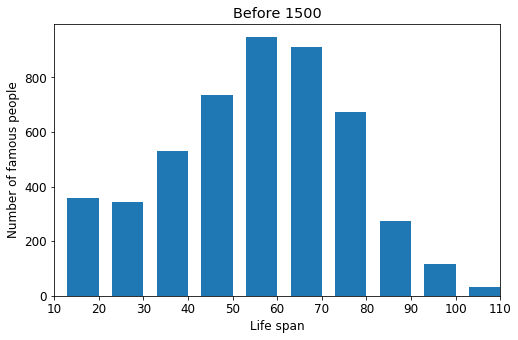

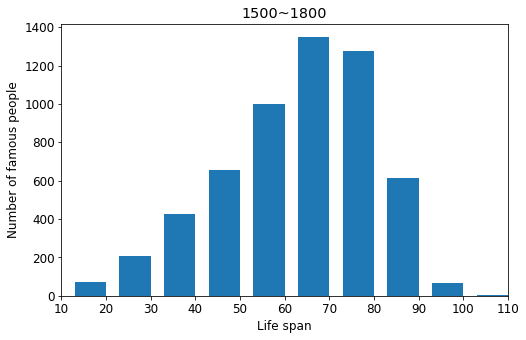

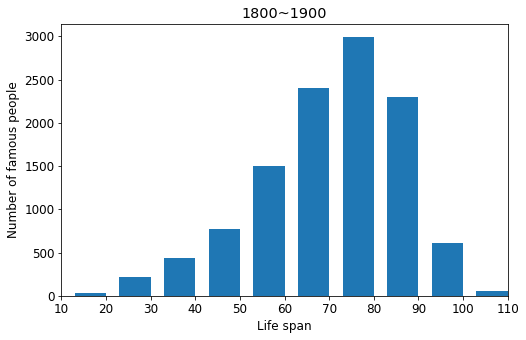

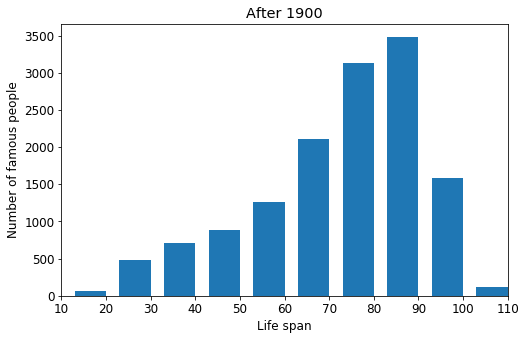

In [5]:
df = pd.read_csv('../data/person_2020_update.csv',low_memory=False)
df.dropna(subset=['birthyear','bplace_country', 'dplace_country', 'birthyear', 'deathyear'], inplace=True)
df1 = df[df['birthyear'] <= 1500].copy()
life_ex = [20,30,40,50,60,70,80,90,100,110,120]
life_y = [0 for x in life_ex]
for i in df1.index:
    tmp = df1.loc[i, 'deathyear'] - df1.loc[i, 'birthyear']
    for j,le in enumerate(life_ex):
        if le >= tmp:
            life_y[j] += 1
            break
plt.figure(figsize=(8,5))
plt.bar(life_ex, life_y, align='edge', width=-7)
plt.xlim(10,110)
plt.xticks([10,20,30,40,50,60,70,80,90,100,110])
plt.title('Before 1500')
plt.ylabel('Number of famous people')
plt.xlabel('Life span')
plt.show()

df1 = df[df['birthyear'] > 1500].copy()
df1 = df1[df1['birthyear'] <= 1800].copy()
life_ex = [20,30,40,50,60,70,80,90,100,110,120]
life_y = [0 for x in life_ex]
for i in df1.index:
    tmp = df1.loc[i, 'deathyear'] - df1.loc[i, 'birthyear']
    for j,le in enumerate(life_ex):
        if le >= tmp:
            life_y[j] += 1
            break
plt.figure(figsize=(8,5))
plt.bar(life_ex, life_y, align='edge', width=-7)
plt.xlim(10,110)
plt.xticks([10,20,30,40,50,60,70,80,90,100,110])
plt.title('1500~1800')
plt.ylabel('Number of famous people')
plt.xlabel('Life span')
plt.show()

df1 = df[df['birthyear'] > 1800].copy()
df1 = df1[df1['birthyear'] <= 1900].copy()
life_ex = [20,30,40,50,60,70,80,90,100,110,120]
life_y = [0 for x in life_ex]
for i in df1.index:
    tmp = df1.loc[i, 'deathyear'] - df1.loc[i, 'birthyear']
    for j,le in enumerate(life_ex):
        if le >= tmp:
            life_y[j] += 1
            break
plt.figure(figsize=(8,5))
plt.bar(life_ex, life_y, align='edge', width=-7)
plt.xlim(10,110)
plt.xticks([10,20,30,40,50,60,70,80,90,100,110])
plt.title('1800~1900')
plt.ylabel('Number of famous people')
plt.xlabel('Life span')
plt.show()

df1 = df[df['birthyear'] > 1900].copy()
life_ex = [20,30,40,50,60,70,80,90,100,110,120]
life_y = [0 for x in life_ex]
for i in df1.index:
    tmp = df1.loc[i, 'deathyear'] - df1.loc[i, 'birthyear']
    for j,le in enumerate(life_ex):
        if le >= tmp:
            life_y[j] += 1
            break
plt.figure(figsize=(8,5))
plt.bar(life_ex, life_y, align='edge', width=-7)
plt.xlim(10,110)
plt.xticks([10,20,30,40,50,60,70,80,90,100,110])
plt.title('After 1900')
plt.ylabel('Number of famous people')
plt.xlabel('Life span')
plt.show()

# Occupations of the famous people

There are a lot of occupations for these famous people, to list a few:
- Politician
- Physicist
- Religious figure
- Military personnel
- Inventor
- Basketball player
- Baseball player
- Golfer
- Racing driver
- ...

It is better to group them into different categories for a clear visualization. We group all the occupations into 8 different fields. For example, basketball player and soccer player are grouped into "Sports". The number of famous people in each field are summed, resulting in the pie chart below. We found that sports accounts for the largest proportion, followed by politics and entertainment. Occupations in these fields generally have more social influence.

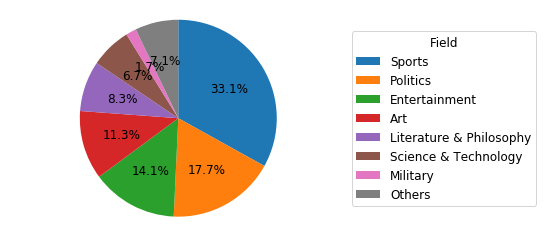

In [7]:
occupation_type = {'POLITICIAN':'Politics', 'PHYSICIST':'Science & Technology', 'RELIGIOUS FIGURE':'Others',
                   'MILITARY PERSONNEL':'Military', 'INVENTOR':'Science & Technology', 'COMPOSER':'Art',
                   'PHILOSOPHER':'Literature & Philosophy', 'ASTRONOMER':'Science & Technology', 'EXPLORER':'Science & Technology',
                   'PAINTER':'Art', 'WRITER':'Literature & Philosophy','MATHEMATICIAN':'Science & Technology',
                   'PSYCHOLOGIST':'Others', 'SOCIAL ACTIVIST':'Others', 'BIOLOGIST':'Science & Technology','ECONOMIST':'Others',
                   'NOBLEMAN':'Others', 'BOXER':'Sports','HISTORIAN':'Literature & Philosophy','ACTOR':'Entertainment','CHEMIST':'Science & Technology',
                   'PHYSICIAN':'Science & Technology', 'SOCIOLOGIST':'Others', 'SOCCER PLAYER':'Sports', 'OCCULTIST':'Others', 'ASTRONAUT':'Science & Technology',
                   'COMPANION':'Others','DESIGNER':'Art','MUSICIAN':'Art','SINGER':'Art','ARCHITECT':'Art','INSPIRATION':'Others','EXTREMIST':'Others',
                   'FILM DIRECTOR':'Entertainment','COMPUTER SCIENTIST':'Science & Technology','DIPLOMAT':'Politics','PRODUCER':'Art','GEOGRAPHER':'Science & Technology',
                   'MAFIOSO':'Others','PILOT':'Military','BUSINESSPERSON':'Others','FASHION DESIGNER':'Art','ARTIST':'Art','CELEBRITY':'Others',
                   'SCULPTOR':'Art', 'ENGINEER':'Science & Technology', 'DANCER':'Art', 'PIRATE':'Others', 'LINGUIST':'Literature & Philosophy',
                   'LAWYER':'Others', 'COMEDIAN':'Entertainment', 'ARCHAEOLOGIST':'Science & Technology', 'MARTIAL ARTS':'Sports', 'COMIC ARTIST':'Entertainment',
                   'ATHLETE':'Sports', 'COACH':'Sports', 'RACING DRIVER':'Sports', 'MAGICIAN':'Entertainment', 'GEOLOGIST':'Science & Technology', 'CONDUCTOR':'Art',
                   'MOUNTAINEER':'Sports','PUBLIC WORKER':'Others', 'CHESS PLAYER':'Sports', 'JUDGE':'Others', 'JOURNALIST':'Others', 
                   'POLITICAL SCIENTIST':'Politics', 'ANTHROPOLOGIST':'Others', 'PHOTOGRAPHER':'Art', 'SWIMMER':'Sports', 'PORNOGRAPHIC ACTOR':'Entertainment',
                   'CYCLIST':'Sports', 'TENNIS PLAYER':'Sports', 'AMERICAN FOOTBALL PLAYER':'Sports', 'STATISTICIAN':'Science & Technology' ,
                   'BASKETBALL PLAYER':'Sports', 'PRESENTER':'Entertainment', 'MODEL':'Entertainment', 'CRITIC':'Literature & Philosophy', 'SKATER':'Sports',
                   'BASEBALL PLAYER':'Sports', 'GYMNAST':'Sports', 'WRESTLER':'Sports', 'REFEREE':'Sports', 'BULLFIGHTER':'Sports',
                   'GAME DESIGNER':'Entertainment', 'YOUTUBER':'Entertainment', 'SKIER':'Sports', 'CHEF':'Others', 'GO PLAYER':'Others',
                   'HOCKEY PLAYER':'Sports', 'FENCER':'Sports', 'GOLFER':'Sports', 'POKER PLAYER':'Sports', 'TABLE TENNIS PLAYER':'Sports',
                   'SNOOKER':'Sports', 'CRICKETER':'Sports', 'HANDBALL PLAYER':'Sports','VOLLEYBALL PLAYER':'Sports', 'RUGBY PLAYER':'Sports',
                   'GAMER':'Entertainment', 'BADMINTON PLAYER':'Sports'}
df3 = None
df3 = pd.read_csv('../data/person_2020_update.csv',low_memory=False)
all_occupations = df3['occupation'].unique()
occupation_dict = {'Sports':0,'Politics':0, 'Entertainment':0, 'Art':0, 'Literature & Philosophy':0,
                  'Science & Technology':0, 'Military':0, 'Others':0}
for i in df3.index:
    occupation_dict[occupation_type[df3.loc[i,'occupation']]] += 1
def func(pct, allvals):
    absolute = int(round(pct/100.*np.sum(allvals)))
    return "{:.1f}%".format(pct)
wedges = plt.pie(occupation_dict.values(),autopct=lambda pct: func(pct, list(occupation_dict.values())),
                 startangle=90,counterclock=False)
plt.legend(wedges, labels=occupation_dict.keys(),title="Field", loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.axis('equal')
plt.show()

# Gender

The figure below shows the gender ratio of famous people. We found that the share of women increases gradually, especially in recent years. This is a good news, suggesting a good trend to gender equality. Women play as important roles as men nowadays. It is noted that although the ratio exceeds 50% for the 21st century, the total number of samples after 2000 is still quite small. Therefore, there will be still a lot to be done in the future.

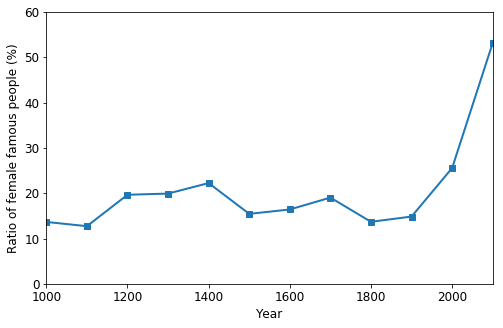

In [8]:
df = pd.read_csv('../data/person_2020_update.csv',low_memory=False)
df.dropna(subset=['gender', 'birthyear'], inplace=True)
gender_x = [1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000,2100]
gender_y = [0 for x in gender_x]
gender_m = [0 for x in gender_x]
gender_f = [0 for x in gender_x]
for i in df.index:
    tmp = df.loc[i, 'gender']
    for j,y in enumerate(gender_x):
        if y >= df.loc[i, 'birthyear']:
            if tmp == 'M':
                gender_m[j] += 1
            else:
                gender_f[j] += 1
            break
gender_y = [(gender_f[i]/ (gender_f[i] + gender_m[i])) for i in range(len(gender_x))]
plt.figure(figsize=(8,5))
plt.plot(gender_x, np.array(gender_y)*100, marker='s',lw=2)
plt.xlim(1000,2100)
plt.ylim(0,60)
plt.ylabel('Ratio of female famous people (%)')
plt.xlabel('Year')
plt.show()

# Summary

Analysing the data of 88,937 famous people, we can summarise with the following findings:
1. The number of famous people increased significantly as the evolution of history, especially in recent years.
2. The fast increase of famous people recently can be attributed to two reasons: the prosperity of time and the information explosion.
3. In ancient time, most famous people were recored around the Mediterranean and east Asia. The distribution gradually expanded to all over the world.
4. Nowadays, Europe and North America are the two places with the largest density of famous people. They are also the most active places of migration.
5. The seemingly essential role of Europe in culture and history may be attributed to a biased Eurocentrism view.
6. Famous people are distributed in all kinds of fields, among which sports, politics, and entertainment have the most influence.
7. From the sex ratio of famous people, we found a larger and larger influence from women which suggests the godd progress of gender equality.

# Github repository

[Link to the github repository](https://github.com/TzekuiRayHO/bee2041_p4/)

# Web deployment

For deploying our blog post, we used GitHub Pages, which is a easy-to-use website for free. We can further use Jekyll for better apperance in the future.

[Link to the web blog post](https://tzekuirayho.github.io/)